<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_13_Finding_How_The_Data_Is_Distributed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head(15)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
print("--- DATAFRAME COLUMNS ---")
print(df.columns)

--- DATAFRAME COLUMNS ---
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [6]:
print("--- DATAFRAME DATA TYPES ---")
print(df.dtypes)

--- DATAFRAME DATA TYPES ---
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [7]:
print("--- DATAFRAME SHAPE ---")
print(df.shape)

--- DATAFRAME SHAPE ---
(65437, 114)


In [8]:
## Write your code here
print("--- DATAFRAME INFO ---")
print(df.info())

--- DATAFRAME INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [9]:
print("--- DATAFRAME NULL VALUES ---")
print(df.isnull().sum())

--- DATAFRAME NULL VALUES ---
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [10]:
print("--- DATAFRAME UNIQUE VALUES ---")
print(df.nunique())

--- DATAFRAME UNIQUE VALUES ---
ResponseId             65437
MainBranch                 5
Age                        8
Employment               110
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6113
JobSat                    11
Length: 114, dtype: int64


In [11]:
print("--- DATAFRAME SUMMARY ---")
df.describe()

--- DATAFRAME SUMMARY ---


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [12]:
print("--- FIRST 5 ROWS ---")
df.head()

--- FIRST 5 ROWS ---


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [26]:
## Write your code here
print("--- DATA CLEANING ---")
#Normalize YearsCode and YearsCodePro
def convert_experience(val):
    if pd.isna(val):
        return 0
    if val == 'Less than 1 year':
        return 0.5
    if val == 'More than 50 years':
        return 51
    try:
      return float(val)
    except ValueError:
        return 0
df['YearsCode'] = df['YearsCode'].apply(convert_experience)
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)
display(df[['YearsCode', 'YearsCodePro']].head())

--- DATA CLEANING ---


,YearsCode,YearsCodePro
0,0.0,0.0
1,20.0,17.0
2,37.0,27.0
3,4.0,0.0
4,9.0,0.0


In [27]:
print("--- AGE X-RAY ---")
print(df['Age'].unique()[:50])
print("\nData type BEFORE conversion:", df['Age'].dtype)
print("\nSample raw values:")
print(df['Age'].head(20))

--- AGE X-RAY ---
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']

Data type BEFORE conversion: object

Sample raw values:
0     Under 18 years old
1        35-44 years old
2        45-54 years old
3        18-24 years old
4        18-24 years old
5     Under 18 years old
6        35-44 years old
7        18-24 years old
8        45-54 years old
9        35-44 years old
10       35-44 years old
11       45-54 years old
12       35-44 years old
13       35-44 years old
14       25-34 years old
15       45-54 years old
16    Under 18 years old
17       18-24 years old
18       25-34 years old
19       35-44 years old
Name: Age, dtype: object


In [28]:
# Turning 'Age' column to numeric with median
import numpy as np

print("--- AGE FIX USING BANDS → NUMERIC ---")

# Keep original banded age in separate column
df.rename(columns={'Age': 'AgeGroup'}, inplace=True)
print("Unique AgeGroup values:", df['AgeGroup'].unique())

--- AGE FIX USING BANDS → NUMERIC ---
Unique AgeGroup values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [29]:
# Map each age band to an approx. numerica age (midpoint of the range)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,   # midpoint ~21
    '25-34 years old': 30,   # midpoint ~30
    '35-44 years old': 40,   # midpoint ~40
    '45-54 years old': 50,   # midpoint ~50
    '55-64 years old': 60,   # midpoint ~60
    '65 years or older': 70, # arbitrary 70+ bucket
    'Prefer not to say': np.nan,
    'No Answer': np.nan      # in case we've filled some earlier
}

# Create numeric Age Column from AgeGroup
df['Age'] = df['AgeGroup'].map(age_map)

# Convert to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

#F Fill missing Age
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

# Display
display(df[['AgeGroup', 'Age']].head(10))
print("Median used:", age_median)
print("Remaining NaN values in Age:", df['Age'].isna().sum())

,AgeGroup,Age
0,Under 18 years old,17.0
1,35-44 years old,40.0
2,45-54 years old,50.0
3,18-24 years old,21.0
4,18-24 years old,21.0
5,Under 18 years old,17.0
6,35-44 years old,40.0
7,18-24 years old,21.0
8,45-54 years old,50.0
9,35-44 years old,40.0


Median used: 30.0
Remaining NaN values in Age: 0


In [30]:
print("--- HANDLING MISSING DATA ---")
# Columns to numeric where needed
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
if 'Comptotal' in df.columns:
  df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

--- HANDLING MISSING DATA ---


In [35]:
# Fill missing text columns
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna("No Answer")

In [37]:
# YearsCode and YearsCodePro using logic
def convert_experience(val):
  if pd.isna(val):
    return 0
  if val == 'Less than 1 year':
    return 0.5
  if val == 'More than 50 years':
    return 51
  try:
    return float(val)
  except ValueError:
    return 0
if 'YearsCode' in df.columns:
  df['YearsCode'] = df['YearsCode'].apply(convert_experience)

if 'YearsCodePro' in df.columns:
  df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

In [44]:
# Fill missing values with 0
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Age')
df[numeric_cols] = df[numeric_cols].fillna("No Answer")

In [45]:
# Final check: no median value
print("Total missing values in the datasert:", df.isna().sum().sum())
print("\nMissing values per columns (should all be 0):")
print(df.isna().sum())

Total missing values in the datasert: 0

Missing values per columns (should all be 0):
ResponseId             0
MainBranch             0
AgeGroup               0
Employment             0
RemoteWork             0
                      ..
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Age                    0
Length: 115, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [46]:
## Write your code here
[col for col in df.columns if "Years" in col or "Code" in col]

['LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro']

In [51]:
print("--- Key Columns Analysis ---")
#Employment distribution
print("\n--- Employment Distribution ---")
display(df['Employment'].value_counts())

--- Key Columns Analysis ---

--- Employment Distribution ---


,count
Employment,
"Employed, full-time",39041
"Independent contractor, freelancer, or self-employed",4846
"Student, full-time",4709
"Employed, full-time;Independent contractor, freelancer, or self-employed",3557
"Not employed, but looking for work",2341
...,...
"Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time",1
"Student, full-time;Retired",1
"Employed, full-time;Not employed, but looking for work;Student, part-time",1


In [52]:
print(" --- CLEANING EMPLOYMENT COLUMN ---")

# Copy to avoid overwriting original if needed later
df_employment = df.copy()

#Split multi-select answers
df_employment['Employment_split'] = df_employment['Employment'].str.split(';')

# Explode into separate rows
df_employment = df_employment.explode('Employment_split').reset_index(drop=True)

# Strip whitespace
df_employment['Employment_split'] = df_employment['Employment_split'].str.strip()

# Replace empty strings
df_employment['Employment_split'] = df_employment['Employment_split'].replace('', 'No Answer')

# Display
print(df_employment['Employment_split'].value_counts().head(20))

 --- CLEANING EMPLOYMENT COLUMN ---
Employment_split
Employed, full-time                                     45162
Independent contractor, freelancer, or self-employed    10726
Student, full-time                                       8626
Employed, part-time                                      4145
Not employed, but looking for work                       3954
Student, part-time                                       2656
Not employed, and not looking for work                   1203
Retired                                                   681
I prefer not to say                                       546
Name: count, dtype: int64


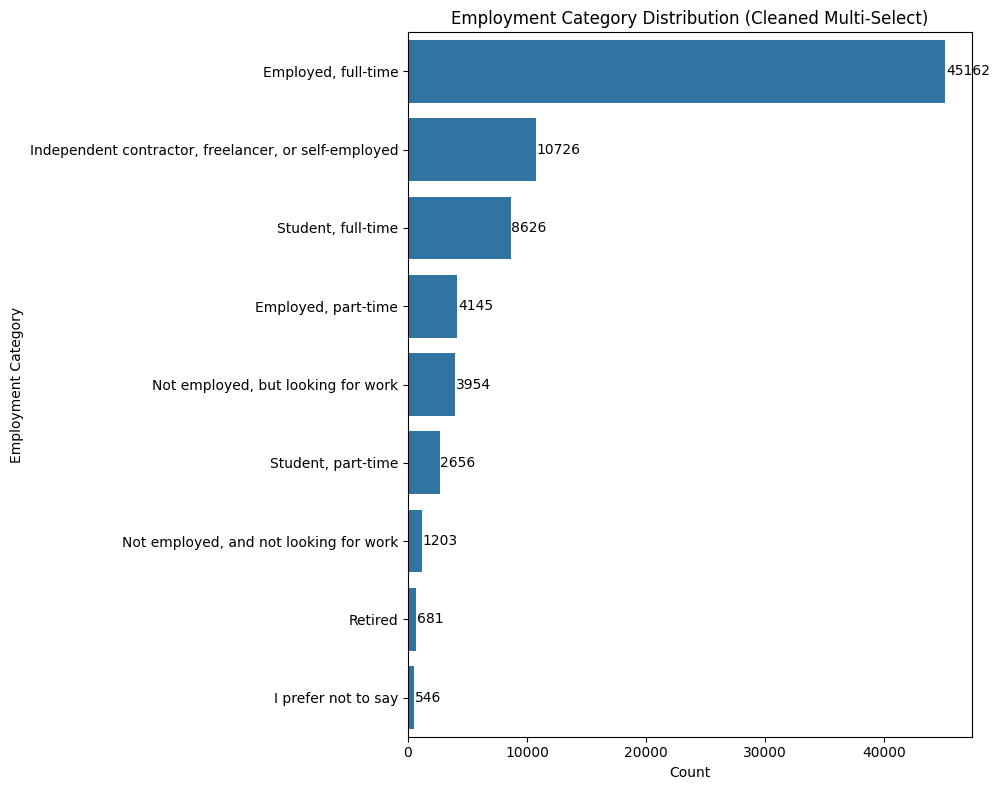

In [56]:
# ---- CLEAN EMPLOYMENT COLUMN ----
df_employment = df.copy()
df_employment['Employment_split'] = df_employment['Employment'].str.split(';')
df_employment = df_employment.explode('Employment_split')
df_employment['Employment_split'] = df_employment['Employment_split'].str.strip()
df_employment['Employment_split'] = df_employment['Employment_split'].replace('', 'No Answer')

# ---- PLOT: HORIZONTAL BAR CHART ----
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=df_employment,
    y='Employment_split',
    order=df_employment['Employment_split'].value_counts().index
)

plt.title("Employment Category Distribution (Cleaned Multi-Select)")
plt.xlabel("Count")
plt.ylabel("Employment Category")

# ---- ADD LABELS (exact counts at end of bars) ----
for p in ax.patches:
    count = int(p.get_width())
    ax.text(
        p.get_width() + 50,              # small offset to the right
        p.get_y() + p.get_height()/2,    # vertically centered on the bar
        str(count),
        ha='left', va='center'
    )

plt.tight_layout()
plt.show()

In [49]:
# Job satisfaction distribution
print("\n--- JobSat ---")
display(df['JobSat'].value_counts())


--- JobSat ---


,count
JobSat,
No Answer,36311
8.0,7509
7.0,6379
6.0,3751
9.0,3626
10.0,2251
5.0,1956
3.0,1165
4.0,1130


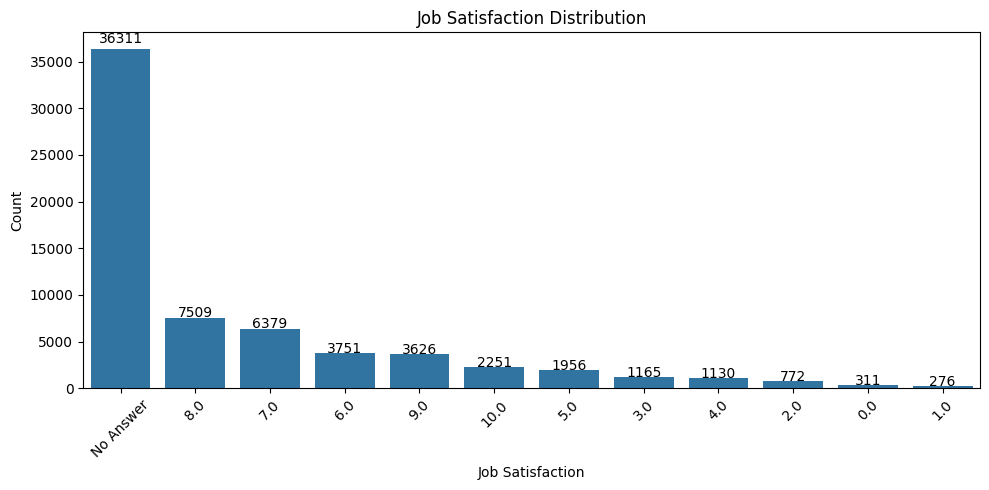

In [57]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df,
    x="JobSat",
    order=df["JobSat"].value_counts().index
)

plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.xticks(rotation=45)

# ---- ADD LABELS at top of bars ----
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width()/2,   # center of bar
        height + (height * 0.02),      # slightly above bar
        str(height),
        ha='center'
    )

plt.tight_layout()
plt.show()


In [50]:
# Professional Coding Experience distribution
print("\n--- YearsCodePro ---")
display(df['YearsCodePro'].value_counts())


--- YearsCodePro ---


,count
YearsCodePro,
0.0,13827
2.0,4168
3.0,4093
5.0,3526
10.0,3251
4.0,3215
0.5,2856
6.0,2843
1.0,2639


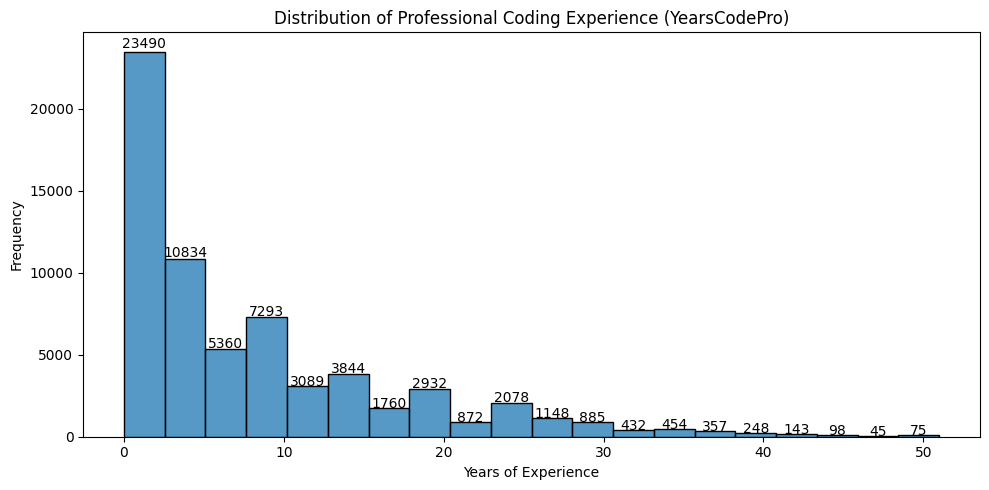

In [58]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df["YearsCodePro"], bins=20, kde=False)

plt.title("Distribution of Professional Coding Experience (YearsCodePro)")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

# ---- ADD LABELS on top of each bar ----
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width()/2,
        height + (height * 0.01),
        str(height),
        ha='center'
    )

plt.tight_layout()
plt.show()


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [59]:
## Write your code here
# Value counts for JobSat (excluding "No Answer" for clearer insight)
job_sat_counts = df[df['JobSat'] != 'No Answer']['JobSat'].value_counts()
print("--- Job Satisfaction Value Counts (excluding 'No Answer') ---")
display(job_sat_counts)

--- Job Satisfaction Value Counts (excluding 'No Answer') ---


,count
JobSat,
8.0,7509
7.0,6379
6.0,3751
9.0,3626
10.0,2251
5.0,1956
3.0,1165
4.0,1130
2.0,772


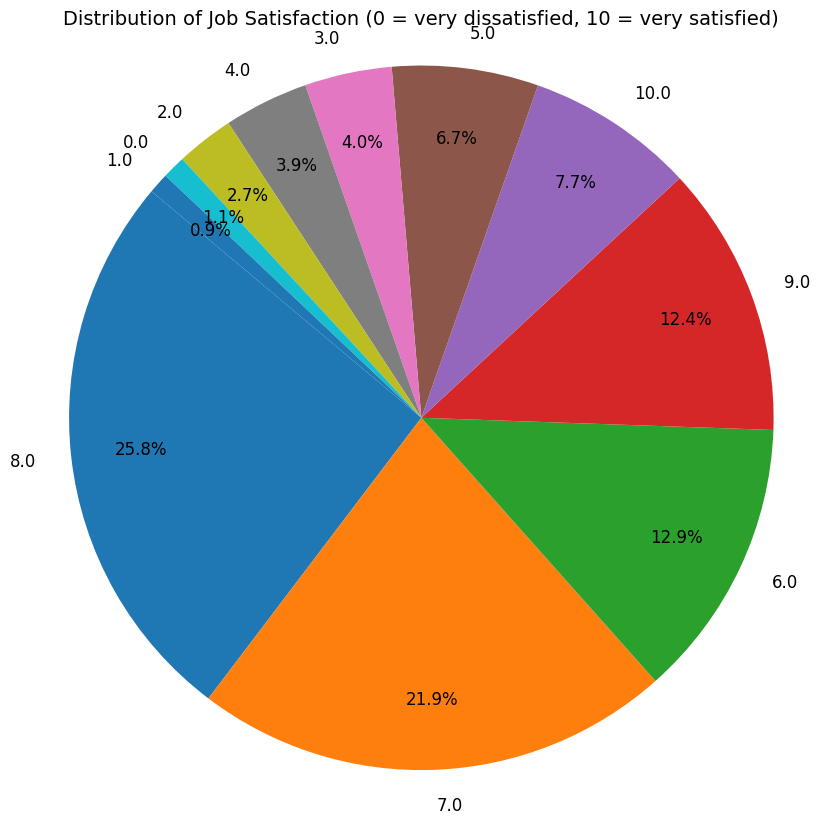

In [63]:
# Pie chart
plt.figure(figsize=(10,10))

# Create the pie chart with labels outside
wedges, texts, autotexts = plt.pie(
    job_sat_counts,
    labels=job_sat_counts.index,
    autopct='%1.1f%%',
    pctdistance=0.8,      # moves % inside slightly
    labeldistance=1.1,     # moves labels OUTSIDE the pie
    startangle=140
)

# Format label text size
for t in texts:
    t.set_fontsize(12)

for a in autotexts:
    a.set_fontsize(12)

plt.title("Distribution of Job Satisfaction (0 = very dissatisfied, 10 = very satisfied)", fontsize=14)
plt.axis('equal')  # makes pie chart round
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [65]:
## Write your code here
print("=== LANGUAGE ANALYSIS ===")

# Make a copy for language processing
df_lang = df.copy()

# Split multi-select columns
df_lang['LangWorked_split'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang['LangWant_split']   = df_lang['LanguageWantToWorkWith'].str.split(';')

# Explode into rows
df_worked = df_lang.explode('LangWorked_split')
df_want   = df_lang.explode('LangWant_split')

# Clean whitespace
df_worked['LangWorked_split'] = df_worked['LangWorked_split'].str.strip()
df_want['LangWant_split']     = df_want['LangWant_split'].str.strip()

# Remove empty values
df_worked = df_worked[df_worked['LangWorked_split'] != ""]
df_want   = df_want[df_want['LangWant_split'] != ""]

worked_counts = df_worked['LangWorked_split'].value_counts().head(20)
want_counts   = df_want['LangWant_split'].value_counts().head(20)

print("\n--- Top 20 Languages Developers HAVE Worked With ---")
display(worked_counts)

print("\n--- Top 20 Languages Developers WANT to Work With ---")
display(want_counts)


=== LANGUAGE ANALYSIS ===

--- Top 20 Languages Developers HAVE Worked With ---


,count
LangWorked_split,
JavaScript,37492
HTML/CSS,31816
Python,30719
SQL,30682
TypeScript,23150
Bash/Shell (all shells),20412
Java,18239
C#,16318
C++,13827



--- Top 20 Languages Developers WANT to Work With ---


,count
LangWant_split,
Python,25047
JavaScript,23774
SQL,22400
HTML/CSS,20721
TypeScript,20239
Rust,17232
Go,13837
Bash/Shell (all shells),13744
C#,12921


In [66]:
# Combine into a single comparison dataframe
lang_compare = pd.DataFrame({
    "HaveWorkedWith": worked_counts,
    "WantToWorkWith": want_counts
}).fillna(0)

lang_compare = lang_compare.sort_values("HaveWorkedWith", ascending=False)
lang_compare.head()

,HaveWorkedWith,WantToWorkWith
JavaScript,37492.0,23774.0
HTML/CSS,31816.0,20721.0
Python,30719.0,25047.0
SQL,30682.0,22400.0
TypeScript,23150.0,20239.0


<Figure size 1400x700 with 0 Axes>

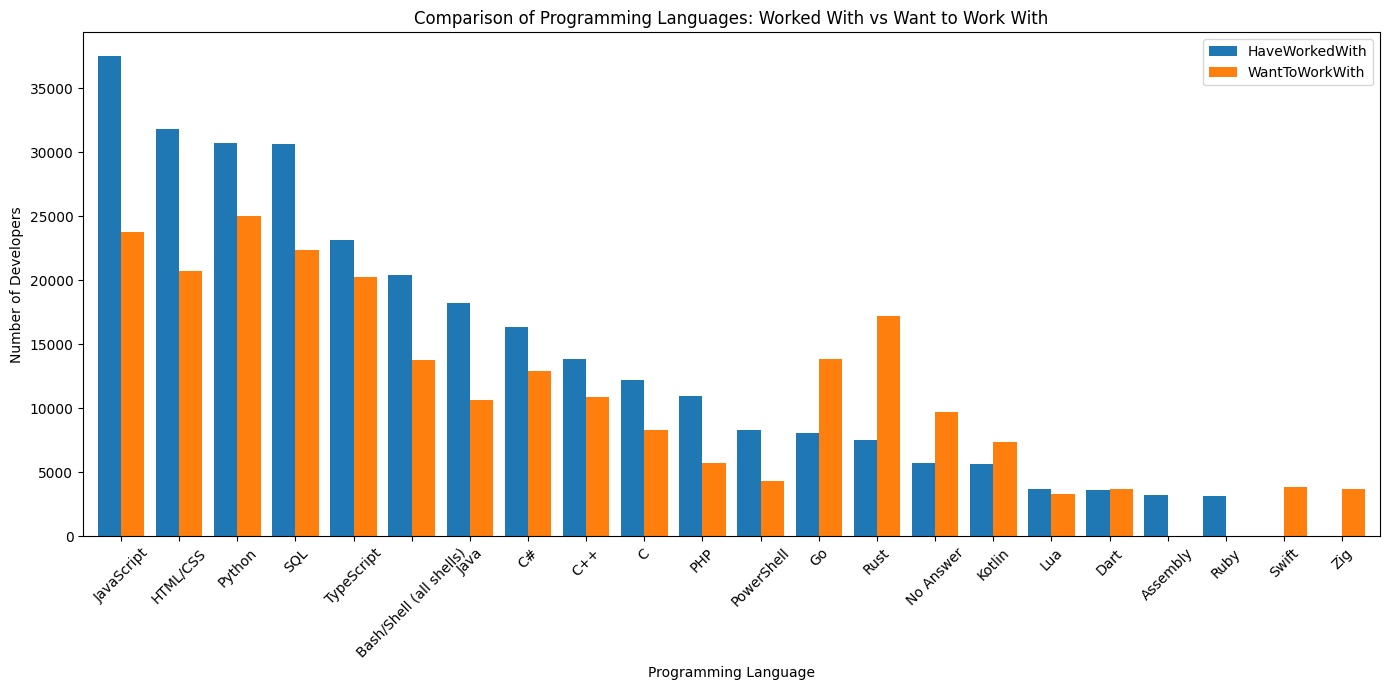

In [67]:
plt.figure(figsize=(14, 7))

ax = lang_compare.plot(
    kind='bar',
    figsize=(14,7),
    width=0.8
)

plt.title("Comparison of Programming Languages: Worked With vs Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Developers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**ANSWER:** Developers most commonly worked with languages such as X, Y, and Z.
The “Want to Work With” chart highlights growing interest in languages like A and B, showing potential shifts in future developer behaviors.
Comparing the two lists reveals which languages are losing or gaining popularity.

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [68]:
## Write your code here
[col for col in df.columns if "Country" in col or "Region" in col or "Location" in col]

['Country']

In [69]:
## Step 7

# Copy dataset for clarity
df_rw = df.copy()

# Clean Country and RemoteWork text
df_rw['Country'] = df_rw['Country'].astype(str).str.strip()
df_rw['RemoteWork'] = df_rw['RemoteWork'].astype(str).str.strip()

# Remove empty entries if any
df_rw = df_rw[(df_rw['Country'] != "") & (df_rw['RemoteWork'] != "")]


In [70]:
# Cross-tab: RemoteWork by Country
rw_ct = pd.crosstab(df_rw['Country'], df_rw['RemoteWork'])

print("=== RemoteWork x Country Crosstab ===")
display(rw_ct.head())


=== RemoteWork x Country Crosstab ===


RemoteWork,"Hybrid (some remote, some in-person)",In-person,No Answer,Remote
Country,,,,
Afghanistan,17,13,16,10
Albania,14,10,11,14
Algeria,19,8,28,22
Andorra,1,5,5,4
Angola,4,6,5,5


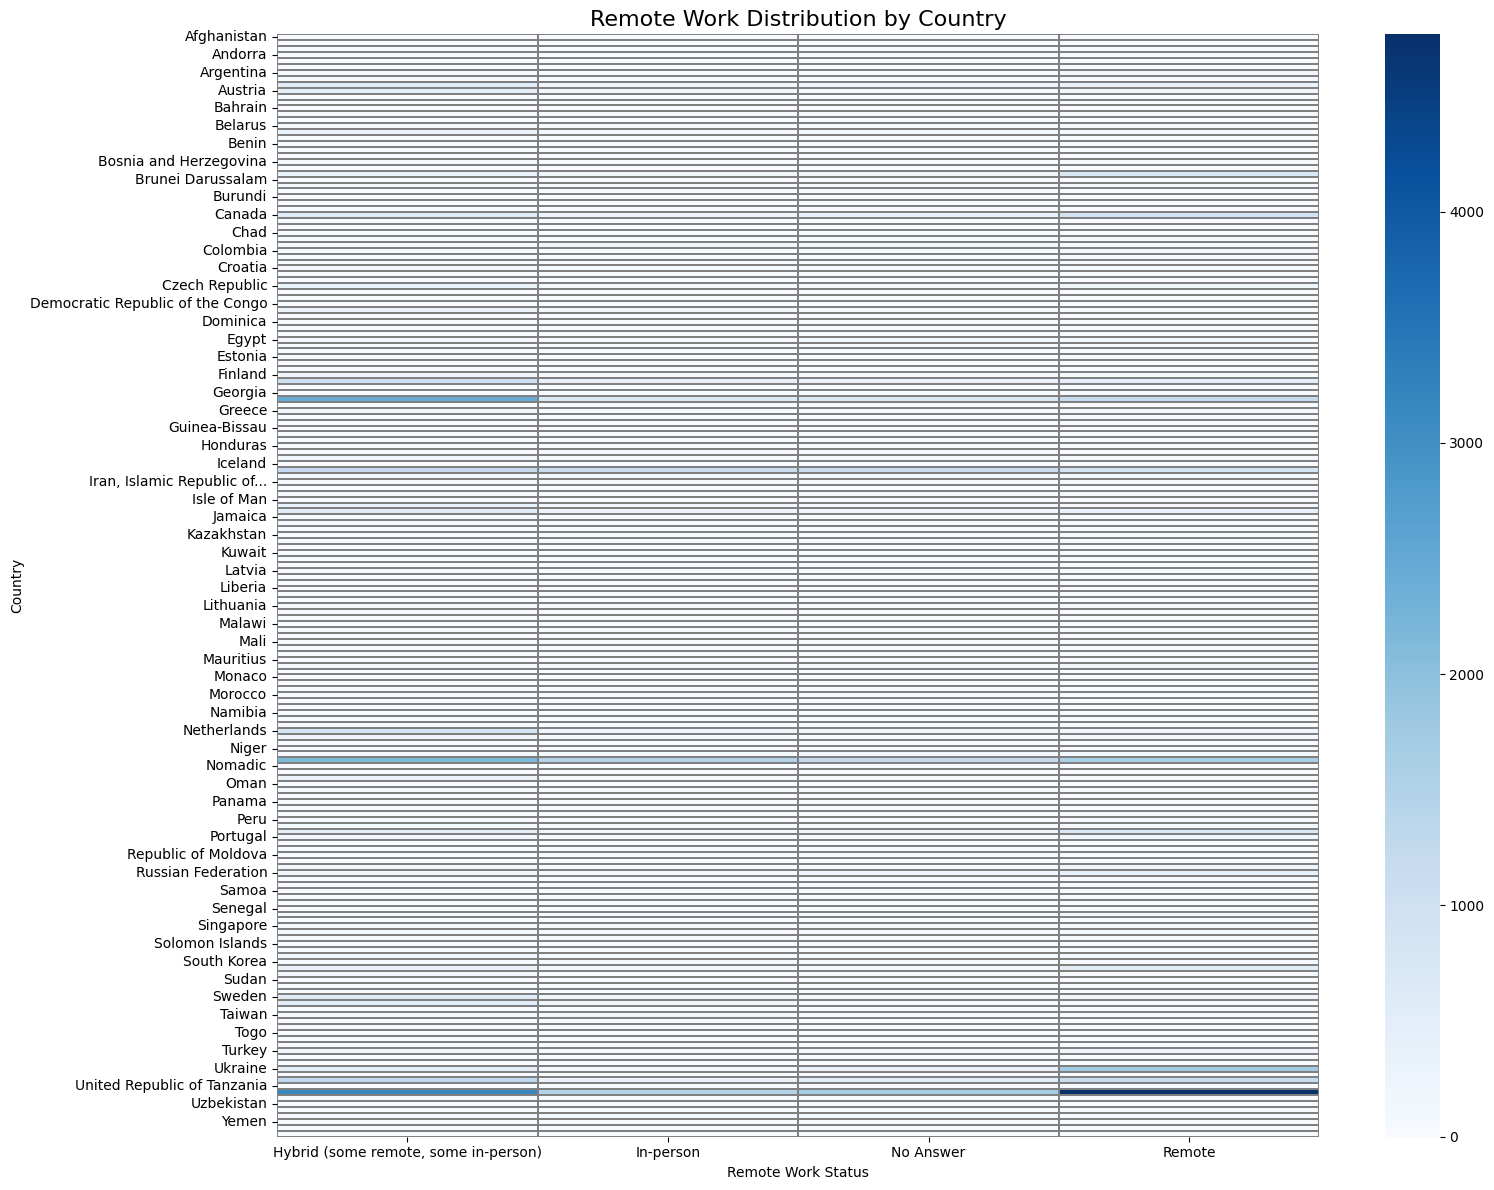

In [71]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    rw_ct,
    cmap="Blues",
    linewidths=0.3,
    linecolor="gray",
    annot=False   # if True = numbers inside boxes (can clutter)
)

plt.title("Remote Work Distribution by Country", fontsize=16)
plt.xlabel("Remote Work Status")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


**ANSWER:** The heatmap shows significant variation in RemoteWork patterns across countries.
Some regions have higher remote-only participation (indicated by darker cells), while others have more hybrid or office-based work. This visualization quickly highlights geographic trends in work preferences.

In [73]:
# Region mapping dictionary
region_map = {
    # North America
    "United States of America": "North America",
    "Canada": "North America",
    "Mexico": "North America",

    # Central America / Caribbean
    "Costa Rica": "Central America",
    "Honduras": "Central America",
    "Guatemala": "Central America",
    "Panama": "Central America",
    "Nicaragua": "Central America",
    "El Salvador": "Central America",
    "Dominican Republic": "Central America",
    "Cuba": "Central America",
    "Puerto Rico": "Central America",

    # South America
    "Brazil": "South America",
    "Argentina": "South America",
    "Chile": "South America",
    "Colombia": "South America",
    "Peru": "South America",
    "Ecuador": "South America",
    "Venezuela": "South America",
    "Uruguay": "South America",
    "Paraguay": "South America",
    "Bolivia": "South America",

    # Europe
    "Germany": "Europe",
    "United Kingdom": "Europe",
    "France": "Europe",
    "Spain": "Europe",
    "Italy": "Europe",
    "Portugal": "Europe",
    "Poland": "Europe",
    "Netherlands": "Europe",
    "Belgium": "Europe",
    "Ireland": "Europe",
    "Czech Republic": "Europe",
    "Austria": "Europe",
    "Sweden": "Europe",
    "Norway": "Europe",
    "Finland": "Europe",
    "Denmark": "Europe",
    "Switzerland": "Europe",
    "Greece": "Europe",
    "Estonia": "Europe",
    "Lithuania": "Europe",
    "Latvia": "Europe",
    "Hungary": "Europe",
    "Croatia": "Europe",
    "Serbia": "Europe",
    "Romania": "Europe",
    "Bulgaria": "Europe",

    # Africa
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Egypt": "Africa",
    "Kenya": "Africa",
    "Morocco": "Africa",
    "Ghana": "Africa",
    "Algeria": "Africa",

    # Asia
    "India": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "Singapore": "Asia",
    "Philippines": "Asia",
    "Indonesia": "Asia",
    "Vietnam": "Asia",
    "Malaysia": "Asia",
    "Bangladesh": "Asia",
    "Pakistan": "Asia",
    "Iran": "Asia",
    "Israel": "Asia",
    "Turkey": "Asia",

    # Oceania
    "Australia": "Oceania",
    "New Zealand": "Oceania"
}

df_rw = df.copy()

# Clean
df_rw['Country'] = df_rw['Country'].astype(str).str.strip()
df_rw['RemoteWork'] = df_rw['RemoteWork'].astype(str).str.strip()

# Map to region
df_rw['Region'] = df_rw['Country'].map(region_map)
df_rw['Region'] = df_rw['Region'].fillna("Other")

# Remove empty or missing RemoteWork
df_rw = df_rw[df_rw['RemoteWork'] != ""]

rw_region_ct = pd.crosstab(df_rw['Region'], df_rw['RemoteWork'])

print("--- RemoteWork by Region Crosstab ---")
display(rw_region_ct)

--- RemoteWork by Region Crosstab ---


RemoteWork,"Hybrid (some remote, some in-person)",In-person,No Answer,Remote
Region,,,,
Africa,376,194,366,414
Asia,2352,2022,1848,1629
Central America,41,36,31,131
Europe,9735,3194,2692,5282
North America,3945,1778,2045,5833
Oceania,710,240,277,429
Other,5321,3197,3079,5876
South America,535,299,293,1237


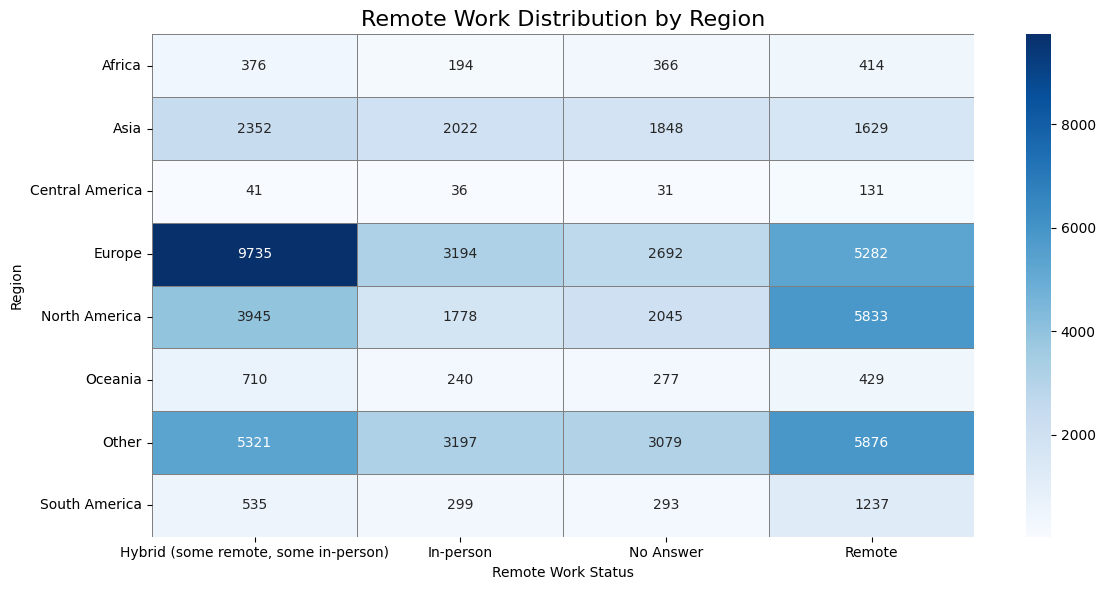

In [74]:
plt.figure(figsize=(12, 6))

sns.heatmap(
    rw_region_ct,
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray",
    annot=True,      # Show counts inside the cells
    fmt="d"          # Format as integers
)

plt.title("Remote Work Distribution by Region", fontsize=16)
plt.xlabel("Remote Work Status")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

**ANSWER:** The heatmap shows the distribution of RemoteWork categories across major world regions.
North America and Europe show stronger adoption of remote or hybrid work, while some regions show a higher proportion of office-based roles.
Aggregating at the regional level reveals clearer patterns and simplifies interpretation compared to a country-level heatmap.

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [75]:
## Write your code here
## Step 8: Correlation between JobSat and YearsCodePro

print("=== Correlation Analysis ===")

# Convert JobSat to numeric if needed
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Calculate Pearson correlation (linear relationship)
pearson_corr = df[['JobSat', 'YearsCodePro']].corr(method='pearson').iloc[0,1]

# Calculate Spearman correlation (ranked/monotonic)
spearman_corr = df[['JobSat', 'YearsCodePro']].corr(method='spearman').iloc[0,1]

print(f"Pearson correlation (JobSat vs YearsCodePro): {pearson_corr:.4f}")
print(f"Spearman correlation (JobSat vs YearsCodePro): {spearman_corr:.4f}")


=== Correlation Analysis ===
Pearson correlation (JobSat vs YearsCodePro): 0.1084
Spearman correlation (JobSat vs YearsCodePro): 0.1221


**ANSWER:** T

**Pearson Correlation:** The Pearson correlation between YearsCodePro and JobSat is 0.1084, which indicates a very weak positive linear relationship. This suggests that as developers gain more professional experience, their job satisfaction increases slightly, but the effect is minimal.

**Spearman Correlation:** The Spearman correlation is 0.1221, also a very weak positive monotonic relationship. This means that even when ranking the values instead of using raw numbers, the trend remains weak.

**Conclusion:** Overall, professional coding experience appears to have limited impact on reported job satisfaction. Developers with more years of experience do not necessarily report significantly higher satisfaction.

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [77]:
## Write your code here
## Step 9: Cross-tab between Employment and EdLevel

df_cross = df.copy()

# Split and explode Employment (multi-select field)
df_cross['Employment_split'] = df_cross['Employment'].str.split(';')
df_cross = df_cross.explode('Employment_split')
df_cross['Employment_split'] = df_cross['Employment_split'].str.strip()
df_cross['Employment_split'] = df_cross['Employment_split'].replace('', 'No Answer')

# Cross-tab
cross_tab = pd.crosstab(df_cross['Employment_split'], df_cross['EdLevel'])

print("=== Employment x EdLevel Cross-tab ===")
display(cross_tab)

=== Employment x EdLevel Cross-tab ===


EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",No Answer,Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment_split,,,,,,,,,
"Employed, full-time",1260,19136,12489,2962,201,2312,1860,4494,448
"Employed, part-time",137,1344,753,322,79,149,623,669,69
I prefer not to say,9,96,53,82,51,29,92,51,83
"Independent contractor, freelancer, or self-employed",323,3711,2679,688,159,485,902,1634,145
"Not employed, and not looking for work",22,226,110,110,155,23,338,174,45
"Not employed, but looking for work",127,1501,555,341,114,86,528,618,84
Retired,23,199,149,36,12,112,24,107,19
"Student, full-time",189,2034,584,787,583,87,2712,1484,166
"Student, part-time",98,817,345,245,90,46,427,522,66


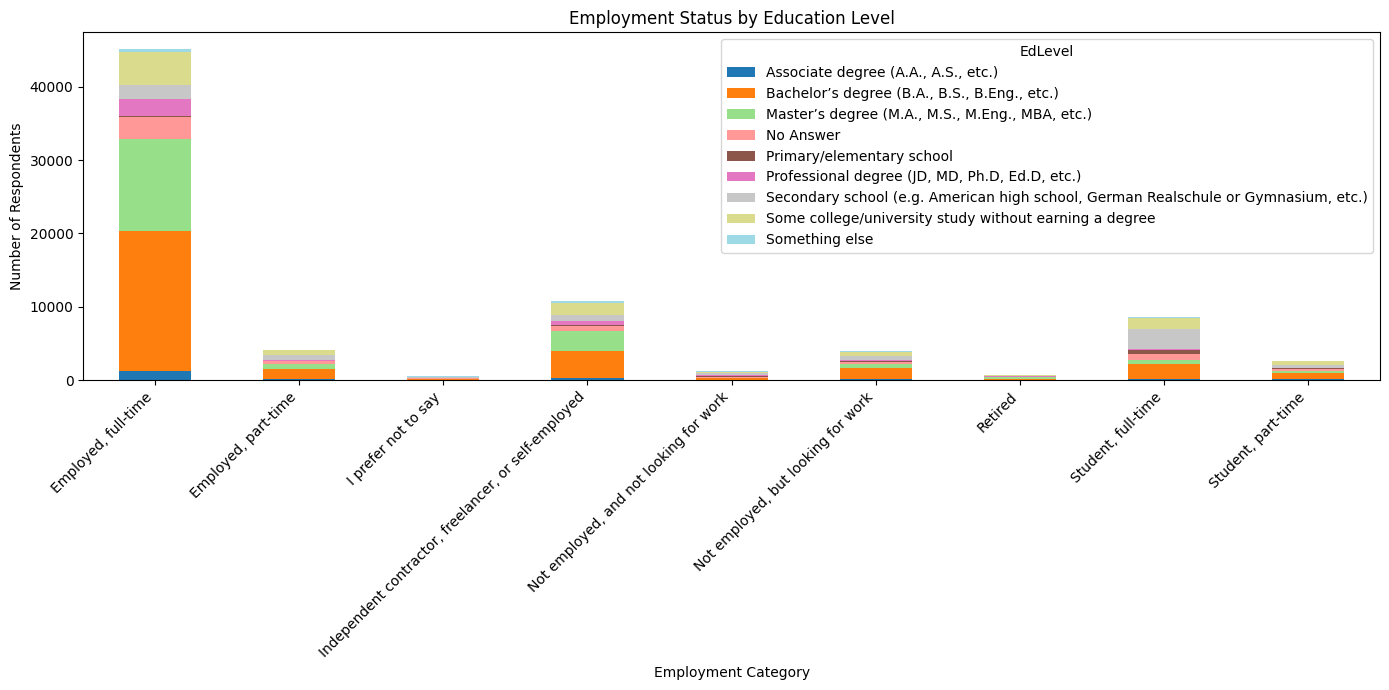

In [78]:
# Plot stacked bar chart
cross_tab.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'
)

plt.title("Employment Status by Education Level")
plt.xlabel("Employment Category")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**ANSWER**: The cross-tabulation shows the distribution of education levels across employment categories.
The stacked bar chart highlights how certain education levels (such as bachelor's degrees or master's degrees) are more common among full-time employees and contractors, while students have higher proportions of lower or ongoing education levels.
This visualization helps identify how education level relates to career status among survey respondents.

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [79]:
## Write your code here
## Step 10: Export cleaned dataset
df.to_csv('cleaned_survey_data.csv', index=False)

print("Cleaned dataset exported as cleaned_survey_data.csv")


Cleaned dataset exported as cleaned_survey_data.csv


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
